# **Exercise 1: Optimize the Rosenbrock function with Gradient Descent**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from IPython.display import display, Image

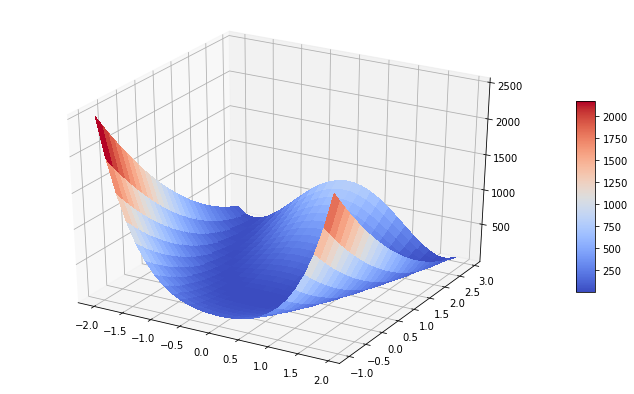

In [ ]:
a=1;
b = 100;
f = lambda x,y: (a - x)**2 + b * (y - x**2)**2;        #Rosenbrock function    with a=a and b=100

# Initialize figure 
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')


X = np.arange(-2, 2, 0.15)       # Func. inputs
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

sur = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=0, antialiased=False)            # Plot the surface



fig.colorbar(sur, shrink=0.5, aspect=10)
plt.show()

In [ ]:
from IPython.display import display, Math, Latex
display(Math(r'f(x,y) = (a-x)^2 + b*(y-x^2)^2'))
display(Math(r'f(x,y) = (1-x)^2 + 100*(y-x^2)^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
display(Math(r'∂f∂x = 2(x-1) - 400x*(y-x^2)'))
display(Math(r'∂f∂y = 200*(y-x^2)'))
display(Math(r'∇f=[−400xy+400x^3+2x−2,200y−200x^2]'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

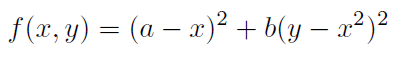

In [ ]:
#Rosenbrock Function
Image(filename = "Rosenbrock_Func.PNG", width=300, height=100)

In [ ]:
def rosenbrock_func(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2


def rosenbrock_der(x,y,a=1,b=100):
    der_x = (-2)*(a-x)+2*b*(y-x**2)*(-2*x)
    der_y = 2*b*(y-x**2)
    return np.array([der_x,der_y])

In [ ]:
def grad_desc(gd,x,y, alpha):
    i = 0
    x_i  = np.empty(0)             #Steps will be recorded for x and y
    y_i = np.empty(0)       
    
    eps=10**-9
    error = 10**-1
    
    X = np.array([x,y])
    
    max_ite = 100000
    while np.linalg.norm(error) > eps and i < max_ite:        #continue if error>epsilon until max iterarion limit
        i +=1
        x_i = np.append(x_i,x)
        y_i = np.append(y_i,y)  

        
        X_prev = X
        X = X - alpha * gd(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    return X, x_i,y_i

In [ ]:
#Looking for optimal hyperparameters (x,y fixed, only changing steplength)   max iteration limit is 100,000
k=grad_desc(rosenbrock_der, -1, 2, 0.00225)      #initial x=-1 and y=2, steplength=00225
m=grad_desc(rosenbrock_der,-1, 2, 0.0005)      #initial x=-1 and y=2, steplength=00225
j=grad_desc(rosenbrock_der,-1, 2, 0.0000001)  

In [ ]:
#h=grad_desc(rosenbrock_der,10, 10, 0.000001)
#h

In [ ]:
print("Global min is = (1,1)")
print("Reached:", k[0])
print("iteration k=", k[1].shape)          # Need more iterations
print("Reached:", m[0])
print("iteration m=", m[2].shape)          # Well optimized
print("Reached:", j[0])
print("iteration j=", j[2].shape)          # Seems steplenght is too small

Global min is = (1,1)
Reached: [0.91455639 0.86597853]
iteration k= (100000,)
Reached: [0.99999776 0.99999552]
iteration m= (61676,)
Reached: [-1.35072902  1.83212167]
iteration j= (100000,)


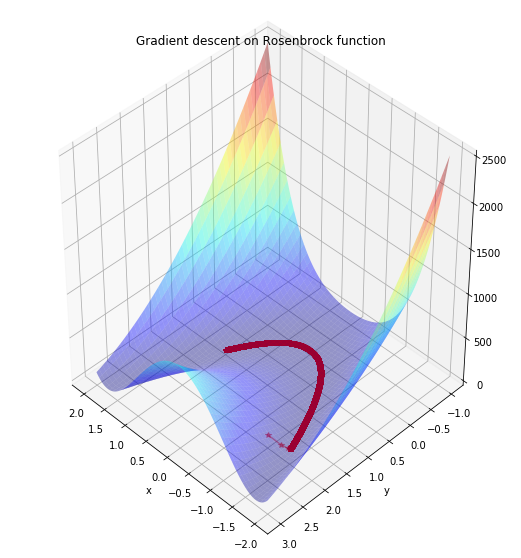

In [ ]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)



fig = plt.figure(figsize = (20,10))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = 0.4)
ax.plot(m[1],m[2], rosenbrock_func(m[1],m[2]),color = 'r', marker = '*', alpha = 0.4)

ax.view_init(40, 135)
plt.title('Gradient descent on Rosenbrock function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Exercise 2: Linear Regression with Gradient Descent**

## Part A: Pre-process the datasets

1.   Convert any non-numeric values to numeric values
2.   Handle missing data or NA
3.   Split the dataset into 80% Train set and 20% Test set
4.   Check for columns to be dropped.


*   Airfare and demand: target -> price
*   Wine Quality: target -> quality
*   Parkisons Dataset: target -> total_UPDRS







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.random import seed, rand, randn
import math
seed(seed=200)

In [ ]:
air_data = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/airq402.csv', header=None, delim_whitespace=True)
wine_data = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/winequality-red.csv',sep=';')
parkinson_data = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/parkinsons_updrs.csv')

### Airfare and demand Dataset

In [ ]:
air_data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
#Exported column names from airq402.txt
columns_airq = ["City1", "City2","Average Fare","Distance","Average weekly passengers","market leading airline","market share","Average fare","Low price airline","market share","price"]


In [ ]:
air_data.columns=columns_airq

In [ ]:
air_data[['City1','City2','market leading airline','Low price airline']].astype('category')
air_hotone = pd.get_dummies(air_data, sparse=True)
print(air_hotone.head())
print(air_hotone.info())

   Average Fare  Distance  Average weekly passengers  market share  \
0        114.47       528                     424.56         70.19   
1        122.47       860                     276.84         75.10   
2        214.42       852                     215.76         78.89   
3         69.40       288                     606.84         96.97   
4        158.13       723                     313.04         39.79   

   Average fare  market share   price  City1_ABQ  City1_ACY  City1_ALB  ...  \
0        111.03         70.19  111.03          0          0          0  ...   
1        123.09         17.23  118.94          0          0          0  ...   
2        223.98          2.77  167.12          0          0          1  ...   
3         68.86         96.97   68.86          0          0          1  ...   
4        161.36         15.34  145.42          0          0          1  ...   

   Low price airline_G4  Low price airline_HP  Low price airline_NK  \
0                     0          

In [ ]:
air_hotone.dtypes

Average Fare                          float64
Distance                                int64
Average weekly passengers             float64
market share                          float64
Average fare                          float64
                                   ...       
Low price airline_TZ         Sparse[uint8, 0]
Low price airline_UA         Sparse[uint8, 0]
Low price airline_US         Sparse[uint8, 0]
Low price airline_WN         Sparse[uint8, 0]
Low price airline_YX         Sparse[uint8, 0]
Length: 217, dtype: object

In [ ]:
'''
City1, City2, market leading airline, Low price airline columns are categorical variables and using hot-one encoding they are converted to numerical binary 1 and 0's depending on whether they are belong to given categories. 

'''

"\nCity1, City2, market leading airline, Low price airline columns are categorical variables and using hot-one encoding they are converted to numerical binary 1 and 0's depending on whether they are belong to given categories. \n\n"

In [ ]:
print(air_hotone.shape)

(1000, 217)


In [ ]:
print(air_hotone.isnull().values.any())

False


In [ ]:
# No missing values or NA in Airfare and demand dataset

In [ ]:
def train(data,fraction):                 #To split dataset into n (80%) Train set and (1-n)% 20% Test set
    n = len(data)
    c=math.ceil((fraction)*n)
    train = data.iloc[:c,:]
    return train

def test(data,fraction):
    n = len(data)
    c=math.ceil((fraction)*n)
    test = data.iloc[c:n,:]
    return test

In [ ]:
air_train = train(air_hotone,0.8)
air_test = test(air_hotone,0.8)

print('Train Air: ' ,air_train.shape)
print('Test Air:' ,air_test.shape)


Train Air:  (800, 217)
Test Air: (200, 217)


In [ ]:
# To determine if a column needs to be removed: First checking NA vales, second high correlation

In [ ]:
print(air_hotone.isnull().values.any())

False


In [ ]:
air_pearsoncorr = air_hotone.corr(method="pearson")
air_pearsoncorr

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410,-0.015512,-0.043395,-0.024907,...,-0.023987,0.120318,-0.060285,0.070318,0.045435,0.032484,0.157407,0.135060,-0.383648,0.019288
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239,-0.019194,-0.012393,0.026510,...,-0.022292,0.131914,0.024836,0.040402,0.046385,0.042391,0.016713,-0.027004,-0.218735,-0.014731
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314,-0.046326,-0.027180,-0.041919,...,-0.015980,-0.010447,0.136523,-0.056569,0.012058,0.225821,-0.088678,-0.067905,0.020247,-0.018707
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672,0.039731,0.123685,-0.020080,...,-0.008562,-0.012376,-0.006541,-0.059734,0.000750,-0.135279,0.070145,0.056783,0.140842,-0.010773
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511,-0.019783,-0.041540,-0.022720,...,-0.037346,0.116697,-0.064026,0.071489,0.057073,0.052165,0.159428,0.119931,-0.377977,0.016795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Low price airline_TZ,0.032484,0.042391,0.225821,-0.135279,0.052165,-0.085219,-0.057155,-0.025400,-0.011889,-0.016848,...,-0.005936,-0.046552,-0.023923,-0.034657,-0.015752,1.000000,-0.045260,-0.062883,-0.102534,-0.010291
Low price airline_UA,0.157407,0.016713,-0.088678,0.070145,0.159428,-0.120865,0.108960,-0.032662,-0.015289,-0.021665,...,-0.007633,-0.059862,-0.030763,-0.044567,-0.020255,-0.045260,1.000000,-0.080862,-0.131851,-0.013234
Low price airline_US,0.135060,-0.027004,-0.067905,0.056783,0.119931,-0.054411,0.083681,-0.045380,-0.021241,0.007153,...,-0.010605,-0.083171,-0.042741,-0.061919,-0.028142,-0.062883,-0.080862,1.000000,-0.183189,-0.018386
Low price airline_WN,-0.383648,-0.218735,0.020247,0.140842,-0.377977,0.407897,-0.319557,0.068990,-0.034635,0.057616,...,-0.017292,-0.135615,-0.069692,-0.100963,-0.045887,-0.102534,-0.131851,-0.183189,1.000000,-0.029980


In [ ]:
# Looking at the missing values there is no need to remove a columns. According to correlation matrix highly correlated columns like Average Fare and Distance can be removed.

### Wine Quality Dataset

In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# All numeric values ==> no need hot-one encoding

In [ ]:
print(wine_data.isnull().values.any())

False


In [ ]:
# No missing values or NA in Wine Quality dataset

In [ ]:
wine_train = train(wine_data,0.8)
wine_test = test(wine_data,0.8)

print('Train Wine: ' ,wine_train.shape)
print('Test Wine:' ,wine_test.shape)

Train Wine:  (1280, 12)
Test Wine: (319, 12)


In [ ]:
wine_data.isnull().values.any()

False

In [ ]:
wine_pearsoncorr = wine_data.corr(method="pearson")
wine_pearsoncorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# Looking at the missing values there is no need to remove a columns. According to correlation matrix highly correlated columns like "citric acid" and "fixed acidity" can be removed. "fixed acidity" seem to be correlated with pH too. "total sulfur dioxide" and "free sulfur dioxide" are correlated as can be seen in their names.

# Parkinson Dataset

In [ ]:
parkinson_data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
# All numeric values ==> no need hot-one encoding

In [ ]:
print(parkinson_data.isnull().values.any())

False


In [ ]:
# No missing values or NA in Parkinson dataset

In [ ]:
parkinson_train = train(parkinson_data,0.8)
parkinson_test = test(parkinson_data,0.8)

print('Train Parkinson: ' ,parkinson_train.shape)
print('Test Parkinson:' ,parkinson_test.shape)

Train Parkinson:  (4700, 22)
Test Parkinson: (1175, 22)


In [ ]:
parkinson_data.isnull().values.any()

False

In [ ]:
parkinson_pearsoncorr = parkinson_data.corr(method="pearson")
parkinson_pearsoncorr

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [ ]:
# Looking at the missing values there is no need to remove a columns. According to correlation matrix highly correlated columns like "total_UPDRS" and "motor_UPDRS" (0.947231 correlation) can be removed. Also, Jitter(%) is correlated with many other columns like PPE and it can be removed. Similarly, Shimmer including columns should be removed as they are correlated with each other and affecting model badly. 

## **Part B: Implement linear regression algorithm with gradient descent algorithm**

In [ ]:
def matrix_X(data):                                      #dataset converted into proper matrix format
    ind_data = data.iloc[:,:-1]
    X=ind_data.values
    XT=X.T
    X = np.vstack([np.ones(len(X)),XT]).T
    return X

def matrix_Y(data):
    c = len(data.columns)
    ind_data = data.iloc[:,c-1:c]
    X=ind_data.values
    return X

In [ ]:
def grad_loss(X,y,B):                            # Gradient function
    return np.matmul(X.T, (np.matmul(X,B)-y))


def loss(X,y,B):                                 # Error calculating function
    return (np.matmul((np.matmul(X,B)-y).T,(np.matmul(X,B)-y)))


def RMSE(X,y,B):                                 # RMSE calculating function
    return (np.sqrt(np.matmul((np.matmul(X,B)-y).T,(np.matmul(X,B)-y))))/X.shape[0]



def grad_desc(alpha, N, X ,y):                   #Gradient descent function with constant learning rate
    n = X.shape[1]                      #individual variable number      
    f=np.matrix([0.0 for i in range(N+1)])
    learning=np.matrix([0.0 for i in range(N+1)])   #init learning rate
    B = np.matrix([0.0 for i in range(n)]).T
    f[0,0]=loss(X,y,B)              # Start loss
    lr = np.zeros(N)         #initilize learning of iterations
    rmse = np.zeros(N)       #initilize rmse of iterations
    for i in range(N):
        rmse[i]=RMSE(X,y,B)     #calculate rmse of iterations
        B=(B - (alpha * grad_loss(X,y,B)))
        f[0,i+1]=loss(X,y,B)    #iteration loss
        learning[0,i]=np.absolute((f[0,i]-f[0,i+1]))
        lr[i]=learning[0,i]
    return lr,rmse

### Airfare and demand Dataset

In [ ]:
air_train = train(air_hotone,0.8)
air_train['price2']=air_train['price']
air_train=air_train.drop(['price'], axis=1)
air_test = test(air_hotone,0.8)
air_test['price2']=air_test['price']
air_test=air_test.drop(['price'], axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
air_trainX = matrix_X(air_train)
air_trainY = matrix_Y(air_train)
air_testX = matrix_X(air_test)
air_testY = matrix_Y(air_test)

print(air_trainX.shape)
print(air_trainY.shape)
print(air_testX.shape)
print(air_testY.shape)

(800, 217)
(800, 1)
(200, 217)
(200, 1)


In [ ]:
print(air_trainX[0:6,:])

[[1.0 114.47 528 ... 0 0 0]
 [1.0 122.47 860 ... 0 0 0]
 [1.0 214.42 852 ... 0 0 0]
 [1.0 69.4 288 ... 0 1 0]
 [1.0 158.13 723 ... 0 1 0]
 [1.0 135.17 1204 ... 0 0 0]]


In [ ]:
air_trainX= air_trainX.astype(float)       # Object to float
air_trainY = air_trainY.astype(float)
air_testX = air_testX.astype(float)
air_testY = air_testY.astype(float)

In [ ]:
#i_max=800

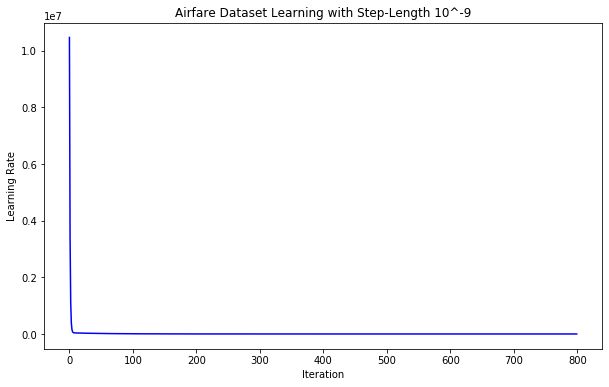

In [ ]:
# Learning Airfare dataset --> Step-Length 10^-9
lr,rmse =grad_desc(10**-9, 800 , air_trainX , air_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Airfare Dataset Learning with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

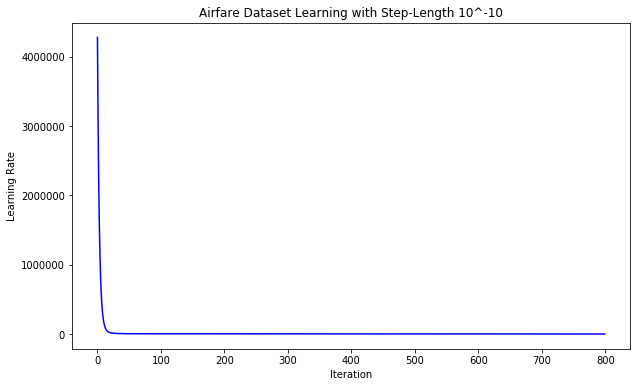

In [ ]:
# Learning Airfare dataset --> Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , air_trainX , air_trainY)
B = pd.DataFrame({'k':range(800), 'lr':lr })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.lr,'b')
plt.title('Airfare Dataset Learning with Step-Length 10^-10')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

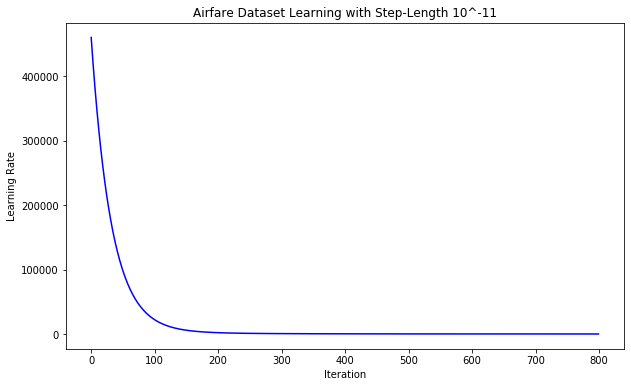

In [ ]:
# Learning Airfare dataset --> Step-Length 10^-11
lr,rmse=grad_desc(10**-11, 800 , air_trainX , air_trainY)
C = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.lr,'b')
plt.title('Airfare Dataset Learning with Step-Length 10^-11')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

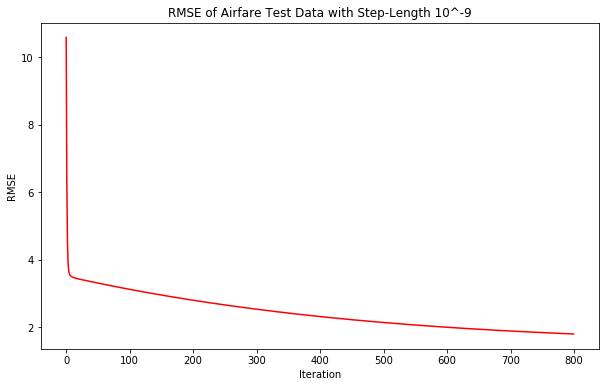

In [ ]:
# RMSE on Airfare test data with Step-Length 10^-9
lr,rmse=grad_desc(10**-9, 800 , air_testX , air_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Airfare Test Data with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

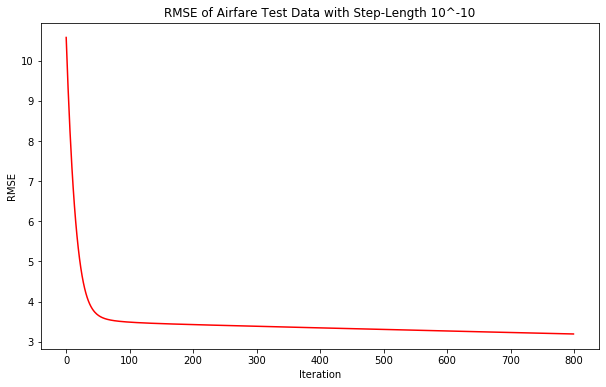

In [ ]:
# RMSE on Airfare test data with Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , air_testX , air_testY)
B = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.rmse,'r')
plt.title('RMSE of Airfare Test Data with Step-Length 10^-10')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

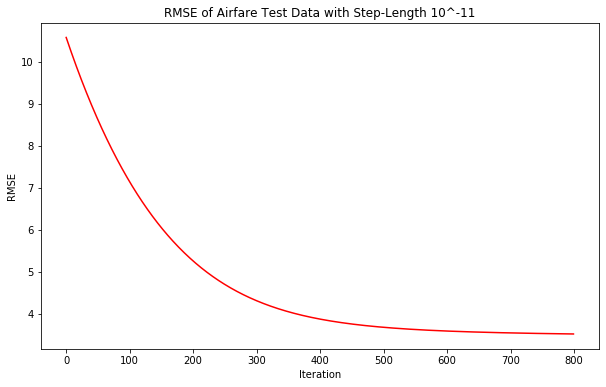

In [ ]:
# RMSE on Airfare test data with Step-Length 10^-11
lr,rmse=grad_desc(10**-11, 800 , air_testX , air_testY)
C = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.rmse,'r')
plt.title('RMSE of Airfare Test Data with Step-Length 10^-11')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

### Wine Quality Dataset

In [ ]:
#Wine quality red dataset converted into proper matrix format
wine_trainX = matrix_X(wine_train)
wine_trainY = matrix_Y(wine_train)
wine_testX = matrix_X(wine_test)
wine_testY = matrix_Y(wine_test)

print(wine_trainX.shape)
print(wine_trainY.shape)
print(wine_testX.shape)
print(wine_testY.shape)

(1280, 12)
(1280, 1)
(319, 12)
(319, 1)


In [ ]:
print(wine_trainX[0:5,:])
#Matrixes

[[1.000e+00 7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01
  3.400e+01 9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [1.000e+00 7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01
  6.700e+01 9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [1.000e+00 7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01
  5.400e+01 9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.000e+00 1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01
  6.000e+01 9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [1.000e+00 7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01
  3.400e+01 9.978e-01 3.510e+00 5.600e-01 9.400e+00]]


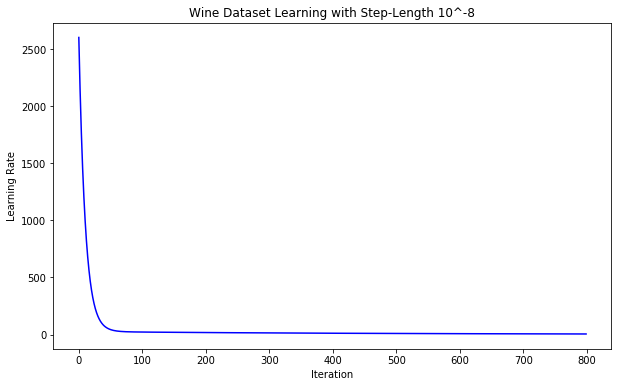

In [ ]:
# Learning Wine dataset --> Step-Length 10^-8
lr,rmse =grad_desc(10**-8, 800 , wine_trainX , wine_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Wine Dataset Learning with Step-Length 10^-8')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

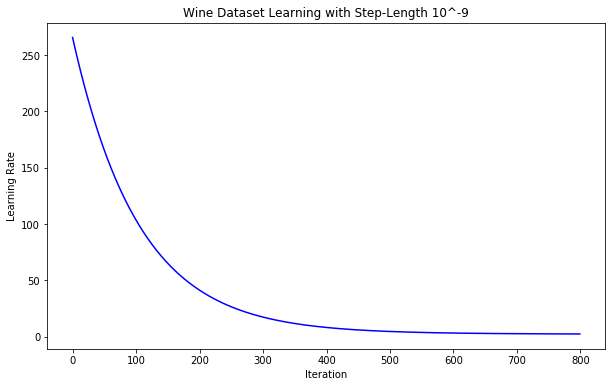

In [ ]:
# Learning Wine dataset --> Step-Length 10^-9
lr,rmse=grad_desc(10**-9, 800 , wine_trainX , wine_trainY)
B = pd.DataFrame({'k':range(800), 'lr':lr })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.lr,'b')
plt.title('Wine Dataset Learning with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

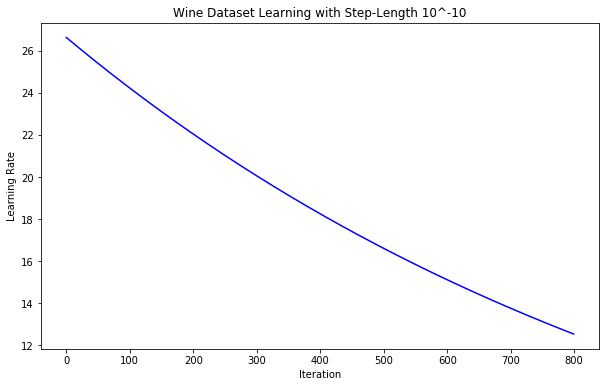

In [ ]:
# Learning Wine dataset --> Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , wine_trainX , wine_trainY)
C = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.lr,'b')
plt.title('Wine Dataset Learning with Step-Length 10^-10')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

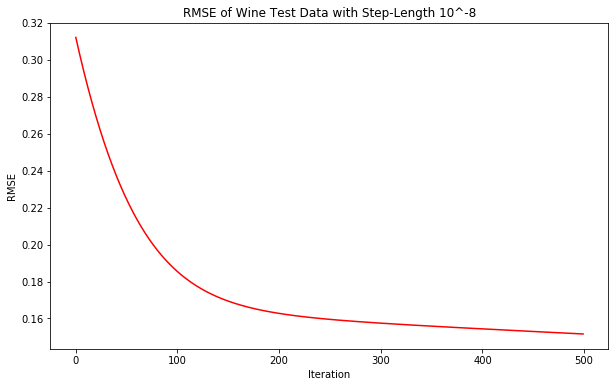

In [ ]:
# RMSE on Wine test data with Step-Length 10^-8
lr,rmse=grad_desc(10**-8, 500 , wine_testX , wine_testY)
A = pd.DataFrame({'k':range(500), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Wine Test Data with Step-Length 10^-8')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

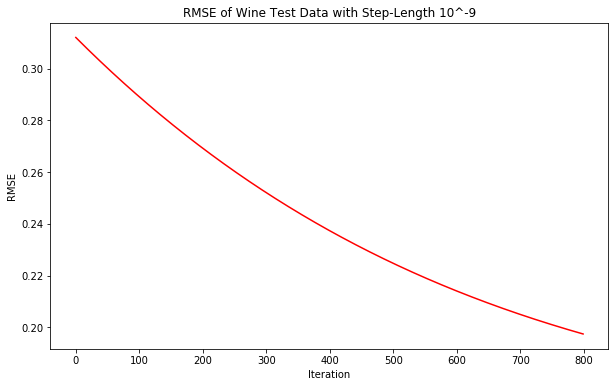

In [ ]:
# RMSE on Wine test data with Step-Length 10^-9
lr,rmse=grad_desc(10**-9, 800 , wine_testX , wine_testY)
B = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.rmse,'r')
plt.title('RMSE of Wine Test Data with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

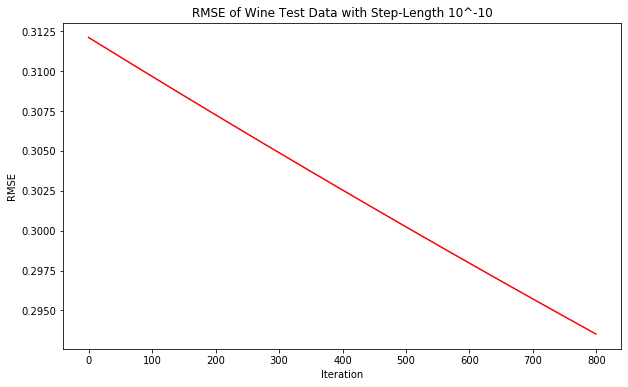

In [ ]:
# RMSE on Wine test data with Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , wine_testX , wine_testY)
C = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.rmse,'r')
plt.title('RMSE of Wine Test Data with Step-Length 10^-10')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

### Parkinson Dataset

In [ ]:
# Parkinson dataset converted into proper matrix format
parkinson_trainX = matrix_X(parkinson_train)
parkinson_trainY = matrix_Y(parkinson_train)
parkinson_testX = matrix_X(parkinson_test)
parkinson_testY = matrix_Y(parkinson_test)

print(parkinson_trainX.shape)
print(parkinson_trainY.shape)
print(parkinson_testX.shape)
print(parkinson_testY.shape)

(4700, 22)
(4700, 1)
(1175, 22)
(1175, 1)


In [ ]:
print(parkinson_trainX[6,:])
#Matrixes

[1.0000e+00 1.0000e+00 7.2000e+01 0.0000e+00 4.7649e+01 2.9682e+01
 3.7363e+01 4.2200e-03 2.4040e-05 2.1200e-03 2.2100e-03 6.3700e-03
 4.3520e-02 4.4500e-01 2.3760e-02 2.6210e-02 3.4880e-02 7.1280e-02
 1.3260e-02 2.2506e+01 4.9250e-01 5.4779e-01]


Text(0, 0.5, 'Learning Rate')

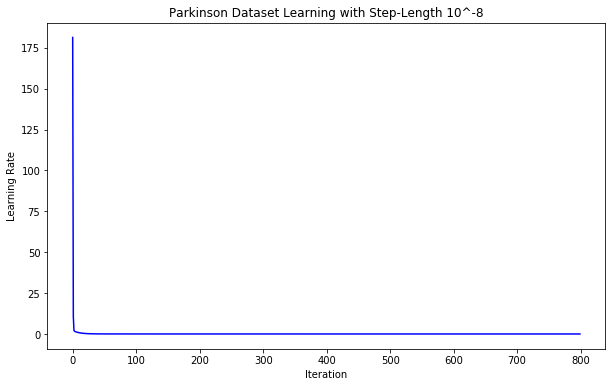

In [ ]:
# Learning Parkinson dataset --> Step-Length 10^-8
lr,rmse =grad_desc(10**-8, 800 , parkinson_trainX , parkinson_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Parkinson Dataset Learning with Step-Length 10^-8')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')

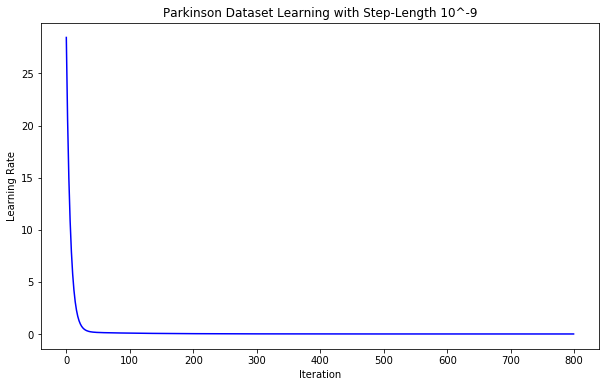

In [ ]:
# Learning Parkinson dataset --> Step-Length 10^-9
lr,rmse=grad_desc(10**-9, 800 , parkinson_trainX , parkinson_trainY)
B = pd.DataFrame({'k':range(800), 'lr':lr })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.lr,'b')
plt.title('Parkinson Dataset Learning with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

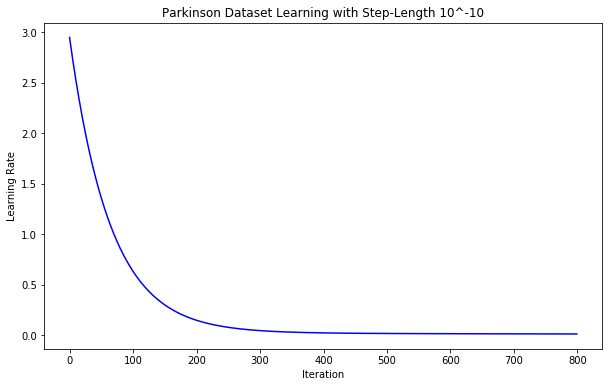

In [ ]:
# Learning Parkinson dataset --> Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , parkinson_trainX , parkinson_trainY)
C = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.lr,'b')
plt.title('Parkinson Dataset Learning with Step-Length 10^-10')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

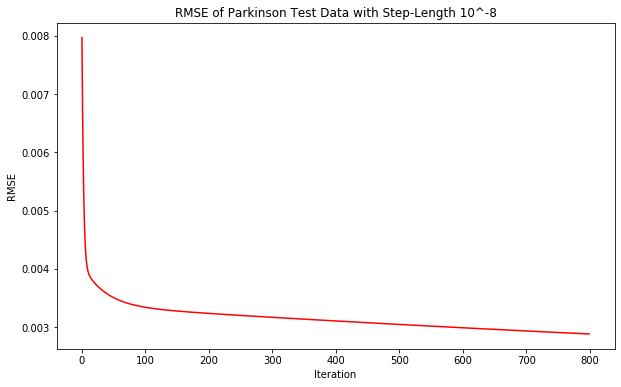

In [ ]:
# RMSE on Parkinson test data with Step-Length 10^-8
lr,rmse=grad_desc(10**-8, 800 , parkinson_testX , parkinson_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Parkinson Test Data with Step-Length 10^-8')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

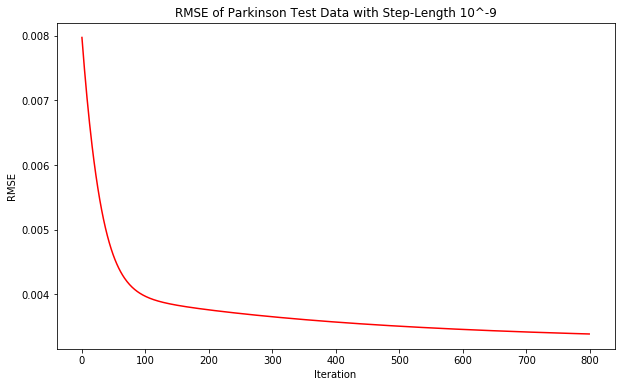

In [ ]:
# RMSE on Parkinson test data with Step-Length 10^-9
lr,rmse=grad_desc(10**-9, 800 , parkinson_testX , parkinson_testY)
B = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B.k,B.rmse,'r')
plt.title('RMSE of Parkinson Test Data with Step-Length 10^-9')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

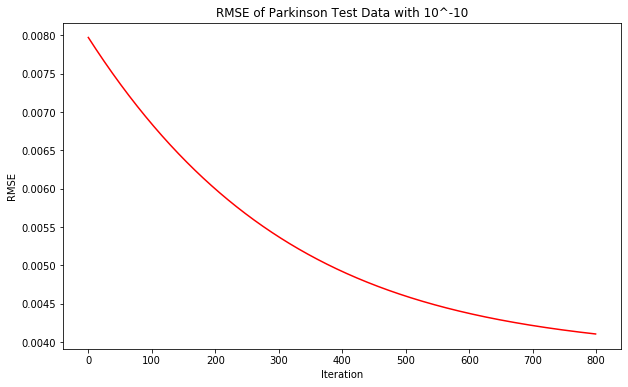

In [ ]:
# RMSE on Parkinson test data with Step-Length 10^-10
lr,rmse=grad_desc(10**-10, 800 , parkinson_testX , parkinson_testY)
C = pd.DataFrame({'k':range(800), 'rmse':rmse})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(C.k,C.rmse,'r')
plt.title('RMSE of Parkinson Test Data with 10^-10')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Explanation on Gradient Descent: Increasing the steplength, Learning becomes quick and then goes steady (very slow) in all 3 datasets. Especially, it is very obvious on Wine dataset: model learned so fast with 10**-8 steplength in 40 iterations which is almost equal to steplength wth 10**-9 in 500 iterations in the same dataset.

In [ ]:
# Explanation on RMSE: RMSE is related to learning with gradient descent because error is decreased with learning the model. RMSE is not decreasing quickly as learning with Gradient descentbecause it is root squared. So it is more flat compered to GD.

# **Exercise 3: Steplength Control for Gradient Descent**


1.   Steplength-backtracking
2.   Steplength-bolddriver



In [ ]:
def backtracking(X,y,B, delta=0.09, alpha=1):    # Backtracking Step-Length Function
    while (loss(X,y,B) - loss(X,y,(B -alpha*grad_loss(X,y,B)))) < (delta * alpha *np.matmul(grad_loss(X,y,B).T,grad_loss(X,y,B))):
        alpha = alpha/2           # Starting steplenght with 1 and decrease its half until the condition is satisfied
    return alpha


def grad_backtracking(N, X ,y):       # Gradient descent with Backtracking step-length
    n = X.shape[1]
    f=np.matrix([0.0 for i in range(N+1)])
    learning=np.matrix([0.0 for i in range(N+1)])
    B = np.matrix([0.0 for i in range(n)]).T
    f[0,0]=loss(X,y,B)
    lr = np.zeros(N)
    rmse = np.zeros(N)
    for i in range(N):
        alpha = 1
        rmse[i]=RMSE(X,y,B)
        alpha = backtracking(X,y,B, delta=1, alpha=1)    #alpha adjusting
        B=(B - (alpha * grad_loss(X,y,B)))
        f[0,i+1]=loss(X,y,B)
        learning[0,i]=np.absolute((f[0,i]-f[0,i+1]))
        lr[i]=learning[0,i]
    return lr,rmse

In [ ]:
def bold_driver(X,y,B, alpha):
    while ((loss(X,y,B) - loss(X,y,(B - alpha*grad_loss(X,y,B)))) <= 0):
        alpha *= 0.5   #Steplenght decreases to its half until the condition is satisfied
    return alpha


def gd_bold_driver(N, X ,y):        # Gradient descent with Bold-driver step-length
    n = X.shape[1]
    f=np.matrix([0.0 for i in range(N+1)])
    learning=np.matrix([0.0 for i in range(N+1)])
    B = np.matrix([0.0 for i in range(n)]).T
    f[0,0]=loss(X,y,B)
    lr = np.zeros(N)
    rmse = np.zeros(N)
    alpha = 1
    for i in range(N):
        alpha *= 1.1       # In each iteration adjusting alpha with 1.1 ratio
        rmse[i]=RMSE(X,y,B)
        alpha = bold_driver(X,y,B, alpha)
        B=(B - (alpha * grad_loss(X,y,B)))
        f[0,i+1]=loss(X,y,B)
        learning[0,i]=np.absolute((f[0,i]-f[0,i+1]))
        lr[i]=learning[0,i]
    return lr,rmse

In [ ]:
def lookahead(X,y,B, alpha, k=10, alpha=0.5):
    for t in range(0,t):
        #synchronize?
        for i in range(1,k):
            B[t,i] := B[t,i-1]+ A[loss(X,y,B)-B[t,i-1]]
        B[t] := B[t-1] + alpha*(B[t,k] - B[t-1])
    return B


def gd_lookahead(N, X ,y):       # Gradient descent with Backtracking step-length
    n = X.shape[1]
    f=np.matrix([0.0 for i in range(N+1)])
    learning=np.matrix([0.0 for i in range(N+1)])
    B = np.matrix([0.0 for i in range(n)]).T
    f[0,0]=loss(X,y,B)
    lr = np.zeros(N)
    rmse = np.zeros(N)
    for i in range(N):
        alpha = 1
        rmse[i]=RMSE(X,y,B)
        alpha = lookahead(X,y,B, delta=1, alpha=0.5)    #alpha adjusting
        B=(B - (alpha * grad_loss(X,y,B)))
        f[0,i+1]=loss(X,y,B)
        learning[0,i]=np.absolute((f[0,i]-f[0,i+1]))
        lr[i]=learning[0,i]
    return lr,rmse

### Airfare and Demand Dataset

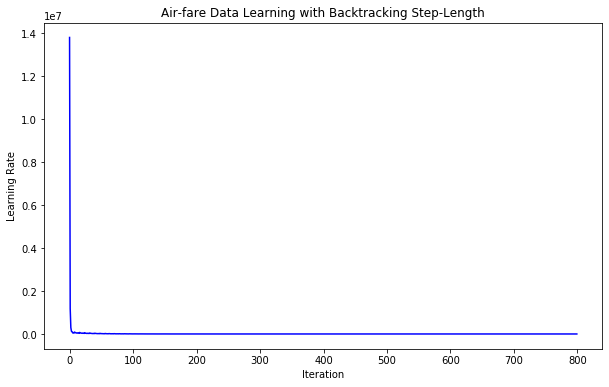

In [ ]:
# Learning Airfare Dataset with Backtracking
lr,rmse =grad_backtracking(800 , air_trainX , air_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Air-fare Data Learning with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

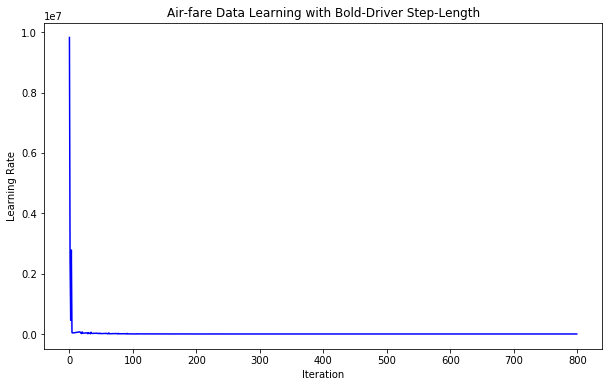

In [ ]:
# Learning Airfare Dataset with Bold-Driver
lr,rmse =gd_bold_driver(800 , air_trainX , air_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Air-fare Data Learning with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

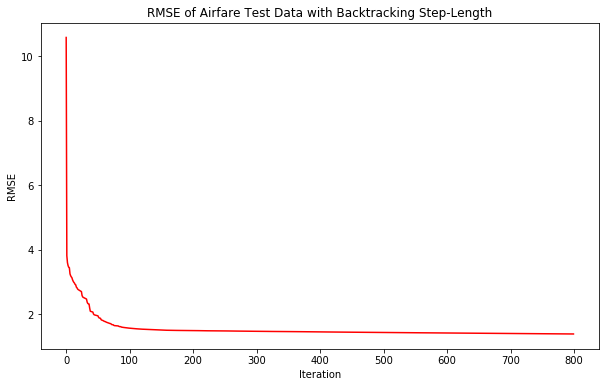

In [ ]:
#RMSE of Airfare Test Dataset with Backtracking
lr,rmse=grad_backtracking(800 , air_testX , air_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Airfare Test Data with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

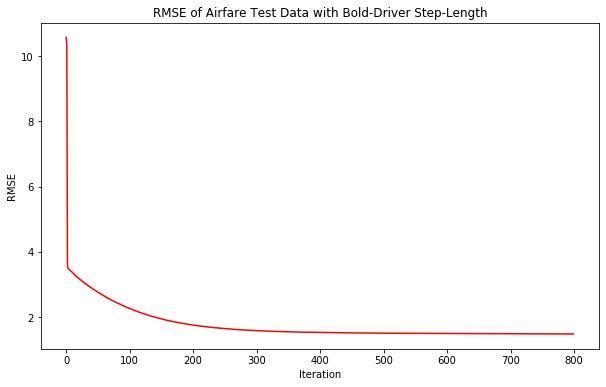

In [ ]:
#RMSE of Airfare Test Dataset with Bold-Driver
lr,rmse=gd_bold_driver(800 , air_testX , air_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Airfare Test Data with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

### Wine Quality Dataset

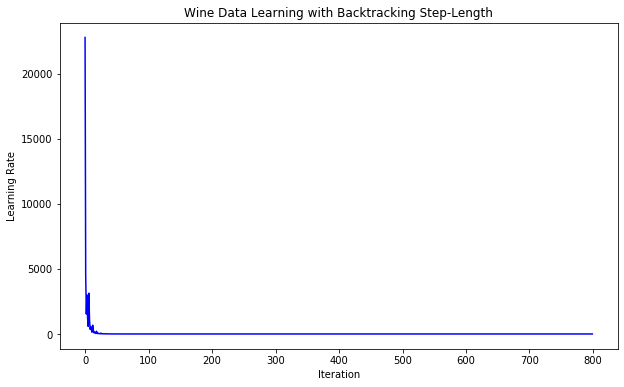

In [ ]:
#Learning Wine Dataset with Backtracking
lr,rmse =grad_backtracking(800 , wine_trainX , wine_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Wine Data Learning with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

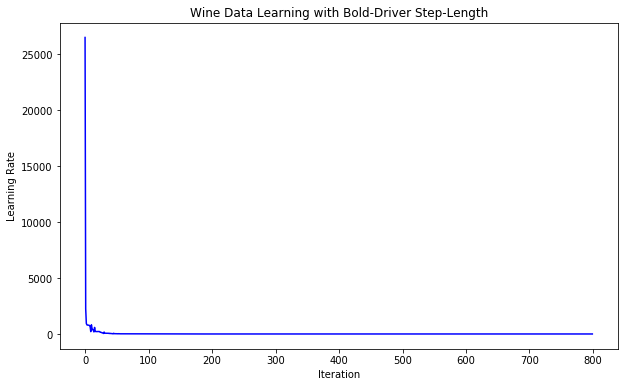

In [ ]:
#Learning Wine Dataset with Bold-Driver
lr,rmse =gd_bold_driver(800 , wine_trainX , wine_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Wine Data Learning with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

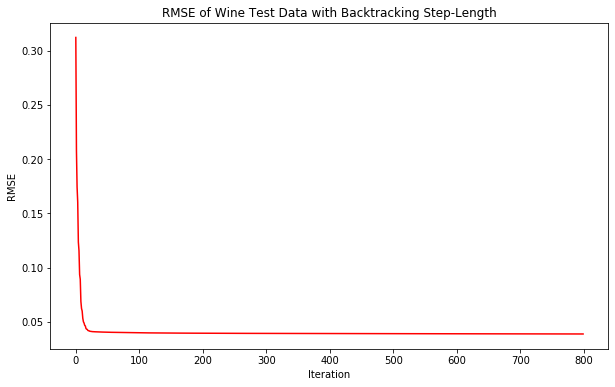

In [ ]:
#RMSE of Wine Test Dataset with Backtracking
lr,rmse=grad_backtracking(800 , wine_testX , wine_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Wine Test Data with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

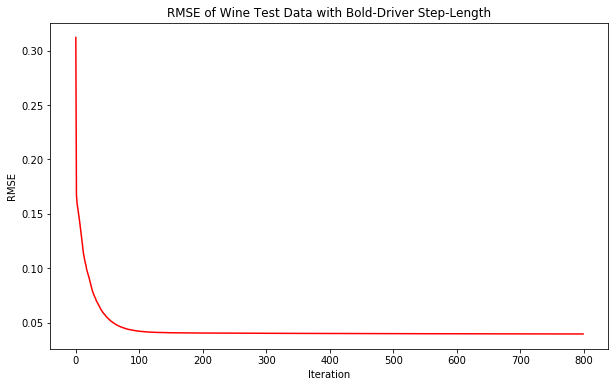

In [ ]:
#RMSE of Wine Test Dataset with Bold-Driver
lr,rmse=gd_bold_driver(800 , wine_testX , wine_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Wine Test Data with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

### Parkinson Dataset

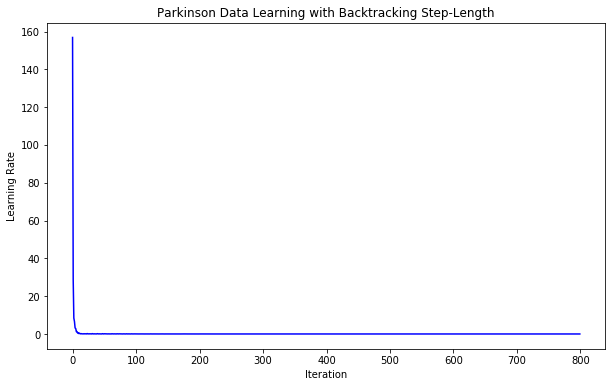

In [ ]:
#Learning Parkinson Dataset with Backtracking
lr,rmse =grad_backtracking(800 , parkinson_trainX , parkinson_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Parkinson Data Learning with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

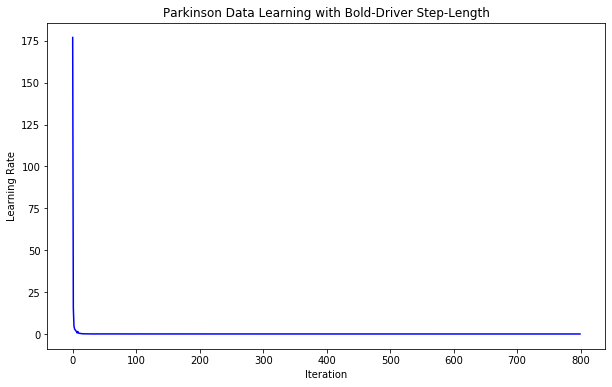

In [ ]:
#Learning Parkinson Dataset with Bold-Driver
lr,rmse =gd_bold_driver(800 , parkinson_trainX , parkinson_trainY)
A = pd.DataFrame({'k':range(800), 'lr':lr})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.lr,'b')
plt.title('Parkinson Data Learning with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

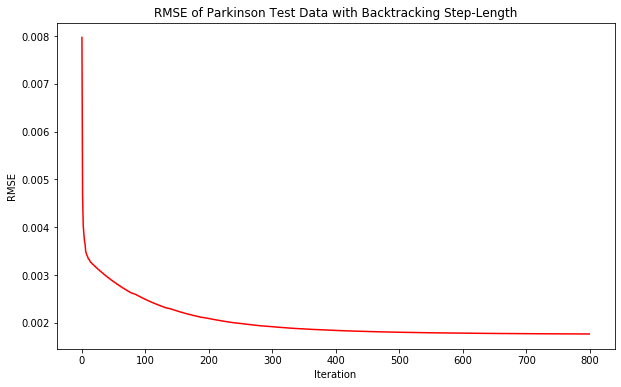

In [ ]:
#RMSE of Parkinson Test Dataset with Backtracking
lr,rmse=grad_backtracking(800 , parkinson_testX , parkinson_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Parkinson Test Data with Backtracking Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

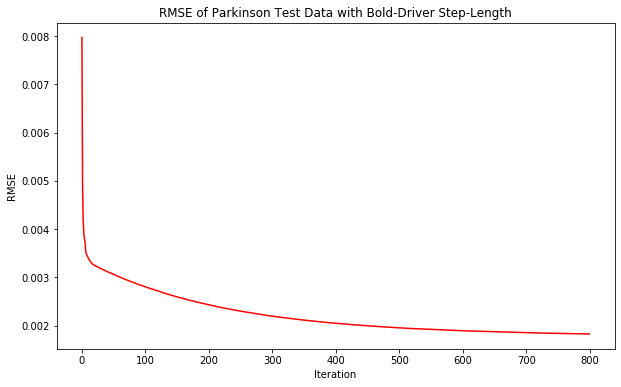

In [ ]:
#RMSE of Parkinson Test Dataset with Bold-Driver
lr,rmse=gd_bold_driver(800 , parkinson_testX , parkinson_testY)
A = pd.DataFrame({'k':range(800), 'rmse':rmse })
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(A.k,A.rmse,'r')
plt.title('RMSE of Parkinson Test Data with Bold-Driver Step-Length')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Explanation : Considering 3 datasets; learning is slightly faster with backtracking compared to bolddriver as they have more steeper lines. Also, both of them converge very quickly. RMSE is not that steep as it takes root square into account, however, it also doesnt need many iterations to converge. Winner is backtracking according to RMSE graphs.

# References

In [ ]:
#https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py
#https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html
#https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook
#https://xavierbourretsicotte.github.io/Intro_optimization.html
#https://arxiv.org/pdf/1907.08610.pdf
#https://stackoverflow.com/questions/51521063/numpy-matmul-object-arrays-not-currently-supported
#https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
#https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python